In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

os.chdir('/content/drive/MyDrive/Capstone/')

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_feather('./data/sentiment140_text_preprocessed_emoji_labeled.ftr')

In [5]:
data.head()

,Text,Top5%,Emoji_1_ind,Emoji_2_ind,Emoji_3_ind,Emoji_4_ind,Emoji_5_ind,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Pct_1,Pct_2,Pct_3,Pct_4,Pct_5
0,hey USER looked lyric end really like listen h...,0.191943246871233,0,41,28,63,49,joy,eyes,see_no_evil,sparkles,speak_no_evil,0.043602355,0.03977332,0.037269104,0.035978198,0.03532027
1,USER getting blocked could bear idea,0.2277749627828598,0,41,14,33,56,joy,eyes,sleeping,thumbsup,no_good,0.057574484,0.05247521,0.04408474,0.037647534,0.035992995
2,interesting night defiance say least hey got g...,0.26046816632151604,0,20,28,9,33,joy,sweat_smile,see_no_evil,smirk,thumbsup,0.05553756,0.052020274,0.05151709,0.051118225,0.050275017
3,im walking around stewie follows playing tuba,0.22554954141378403,0,44,51,31,9,joy,smiling_imp,skull,sunglasses,smirk,0.059877343,0.043824974,0.04372653,0.041439686,0.036681008
4,lol know bruce willis born germany,0.24352717027068138,0,31,40,9,53,joy,sunglasses,clap,smirk,smile,0.06618727,0.05617067,0.04535873,0.040847998,0.034962505


In [6]:
data.shape

(1479467, 17)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1479467 entries, 0 to 1479466
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Text         1479467 non-null  object
 1   Top5%        1479467 non-null  object
 2   Emoji_1_ind  1479467 non-null  object
 3   Emoji_2_ind  1479467 non-null  object
 4   Emoji_3_ind  1479467 non-null  object
 5   Emoji_4_ind  1479467 non-null  object
 6   Emoji_5_ind  1479467 non-null  object
 7   Emoji_1      1479467 non-null  object
 8   Emoji_2      1479467 non-null  object
 9   Emoji_3      1479467 non-null  object
 10  Emoji_4      1479467 non-null  object
 11  Emoji_5      1479467 non-null  object
 12  Pct_1        1479467 non-null  object
 13  Pct_2        1479467 non-null  object
 14  Pct_3        1479467 non-null  object
 15  Pct_4        1479467 non-null  object
 16  Pct_5        1479467 non-null  object
dtypes: object(17)
memory usage: 191.9+ MB


In [8]:
# Text 결측치 처리
data = data.dropna(axis=0)

In [9]:
data['Emoji_1_ind'].unique()

array(['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18',
       '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28',
       '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38',
       '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58',
       '59', '6', '60', '61', '62', '63', '7', '8', '9'], dtype=object)

In [10]:
# data = data[data['Emoji_1_ind'] != 'Emoji_1_ind'].reset_index(drop = True)
# data.to_feather('/content/drive/MyDrive/Capstone/data/sentiment140_text_preprocessed_emoji_labeled.ftr')

In [10]:
data = data.astype({'Emoji_1_ind' : 'int', 'Emoji_2_ind' : 'int','Emoji_3_ind' : 'int','Emoji_4_ind' : 'int','Emoji_5_ind' : 'int'})
data = data.astype({'Pct_1' : 'float', 'Pct_2' : 'float','Pct_3' : 'float','Pct_4' : 'float','Pct_5' : 'float'})
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1479467 entries, 0 to 1479466
Data columns (total 17 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Text         1479467 non-null  object 
 1   Top5%        1479467 non-null  object 
 2   Emoji_1_ind  1479467 non-null  int64  
 3   Emoji_2_ind  1479467 non-null  int64  
 4   Emoji_3_ind  1479467 non-null  int64  
 5   Emoji_4_ind  1479467 non-null  int64  
 6   Emoji_5_ind  1479467 non-null  int64  
 7   Emoji_1      1479467 non-null  object 
 8   Emoji_2      1479467 non-null  object 
 9   Emoji_3      1479467 non-null  object 
 10  Emoji_4      1479467 non-null  object 
 11  Emoji_5      1479467 non-null  object 
 12  Pct_1        1479467 non-null  float64
 13  Pct_2        1479467 non-null  float64
 14  Pct_3        1479467 non-null  float64
 15  Pct_4        1479467 non-null  float64
 16  Pct_5        1479467 non-null  float64
dtypes: float64(5), int64(5), object(7)
memory usag

In [11]:
data.sort_values(by = ['Emoji_1_ind'], inplace = True)

In [12]:
data['Emoji_1'].value_counts()

thumbsup        135717
sleeping         72367
mask             67080
cry              62986
eyes             57204
                 ...  
sob               3598
purple_heart      2196
heart             2114
neutral_face      1797
yellow_heart       741
Name: Emoji_1, Length: 64, dtype: int64

In [13]:
data['Emoji_1_ind'].value_counts()

33    135717
14     72367
39     67080
34     62986
41     57204
       ...  
3       3598
59      2196
8       2114
25      1797
47       741
Name: Emoji_1_ind, Length: 64, dtype: int64

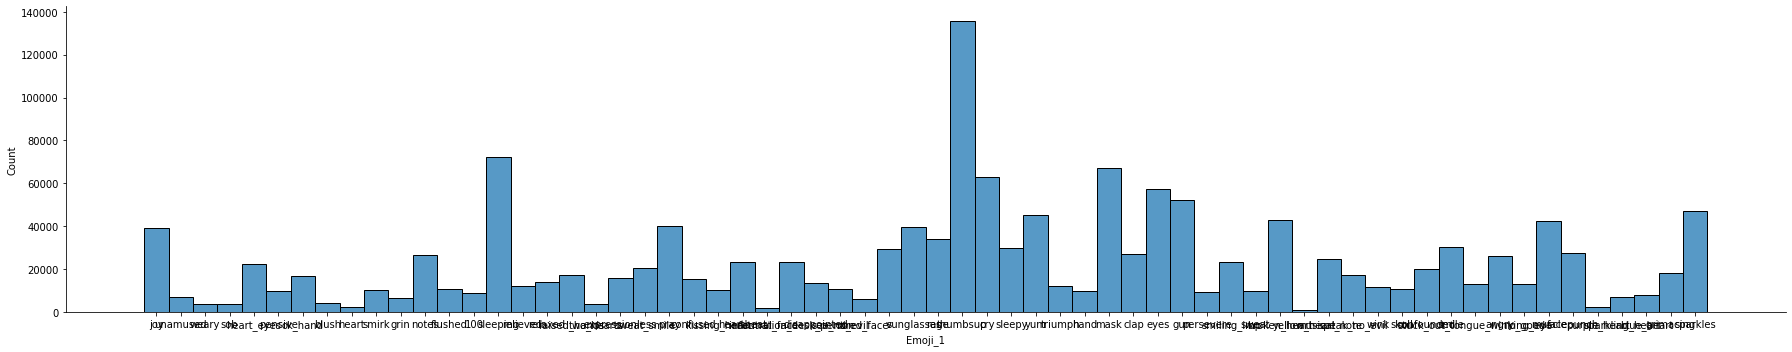

In [14]:
sns.displot(x=data['Emoji_1'], height = 5, aspect = 5)

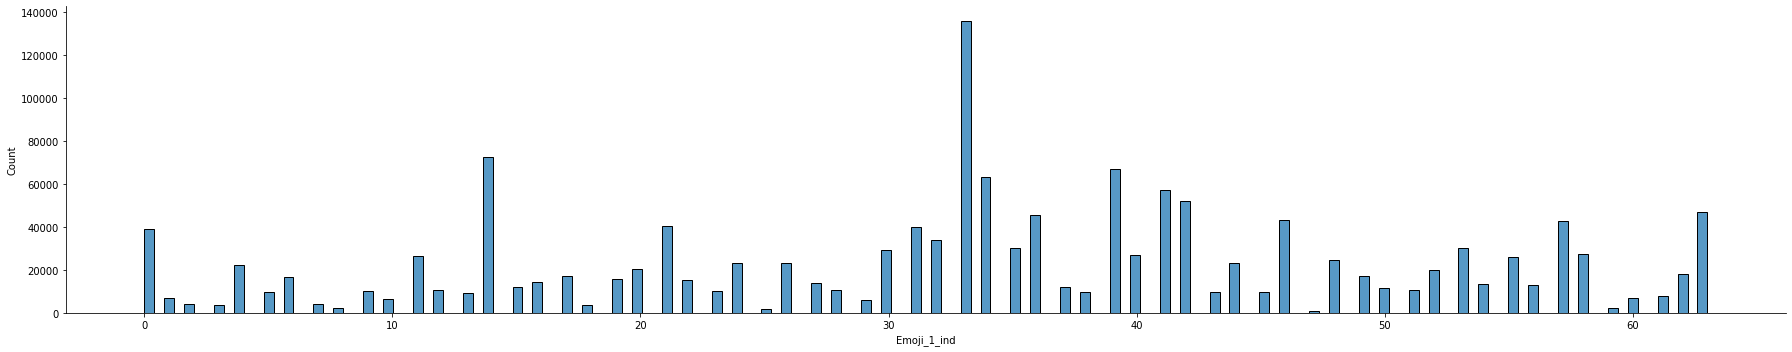

In [15]:
sns.displot(x=data['Emoji_1_ind'], height = 5, aspect = 5)

## Preprocessing

### Percentage Slicing

In [16]:
data.groupby(['Emoji_1_ind'])['Pct_1'].min().max()

0.035881177

In [17]:
data.groupby(['Emoji_1_ind'])['Pct_1'].max().min()

0.1704637

In [18]:
data_per10 = data[data['Pct_1'] >= 0.1]
data_per10.shape

(625595, 17)

In [19]:
data_per10['Emoji_1'].value_counts()

sleeping        54115
mask            52518
thumbsup        50752
cry             35784
yum             32816
                ...  
weary             566
two_hearts        517
heart             244
yellow_heart      121
neutral_face      116
Name: Emoji_1, Length: 64, dtype: int64

In [20]:
data_per10['Emoji_1_ind'].value_counts()

14    54115
39    52518
33    50752
34    35784
36    32816
      ...  
2       566
18      517
8       244
47      121
25      116
Name: Emoji_1_ind, Length: 64, dtype: int64

In [21]:
data_per5 = data[data['Pct_1'] >= 0.05]
data_per5.shape

(1371863, 17)

In [22]:
data_per5['Emoji_1'].value_counts()

thumbsup        126877
sleeping         71218
mask             65981
cry              60260
eyes             51552
                 ...  
sob               3048
purple_heart      2147
heart             1937
neutral_face      1553
yellow_heart       686
Name: Emoji_1, Length: 64, dtype: int64

In [23]:
# data = data_per10

### Sentiment Reduce

In [24]:
# data_emoji = data[data['Emoji_1_ind'].isin([55])]
# data_emoji

In [25]:
# data[data['Text'].isin(['thank donnie love ya '])]

In [26]:
# data_emoji['Emoji_2'].value_counts()
# dict(data_emoji['Emoji_2'].value_counts())

In [27]:
# data_emoji_smile = data[data['Emoji_1_ind'].isin([0, 7, 10, 12, 16, 20, 28, 49, 51, 53, 62])]
# data_emoji_angry = data[data['Emoji_1_ind'].isin([1, 19, 22, 25, 32, 37, 55])]
# data_emoji_tired = data[data['Emoji_1_ind'].isin([2, 14, 29, 35, 39, 42, 43, 45, 52])]
# data_emoji_cry = data[data['Emoji_1_ind'].isin([3, 5, 27, 34, 46])]
# data_emoji_love = data[data['Emoji_1_ind'].isin([4, 8, 18, 23, 24, 47, 59, 60, 61, 63])]
# data_emoji_good = data[data['Emoji_1_ind'].isin([6, 9, 11, 13, 15, 17, 21, 26, 30, 31, 33, 36, 38, 40, 41, 44, 48, 50, 54, 56, 57, 58])]

# data_emoji_information = data[data['Emoji_1_ind'].isin([9, 26, 41, 50])]
# data_emoji_note = data[data['Emoji_1_ind'].isin([11, 48])]
# data_emoji_no_good = data[data['Emoji_1_ind'].isin([38, 56])]
# data_emoji_confounded = data[data['Emoji_1_ind'].isin([39, 43])]
# data_emoji_angry = data[data['Emoji_1_ind'].isin([32])]
# data_emoji_flushed = data[(data['Emoji_1_ind'] == 12) & ]
# data_emoji_sleepy = data[data['Emoji_1_ind'].isin([14])] data[(data['Emoji_1_ind'] == 14) & ]
# data_emoji_evil = data[(data['Emoji_1_ind'] == 28) & ]

In [28]:
# for i in range(1, 6):

#   data.loc[data[f'Emoji_{i}_ind'].isin([0, 6, 7, 9, 10, 11, 12, 13, 15, 16, 17, 20, 21, 26, 28, 31, 33, 40, 41, 44, 48, 49, 50, 51, 53, 54, 57, 62]), f'Emoji_{i}_ind'] = 0
#   data.loc[data[f'Emoji_{i}_ind'].isin([1, 19, 22, 25, 32, 37, 38, 55, 56, 58]), f'Emoji_{i}_ind'] = 1
#   data.loc[data[f'Emoji_{i}_ind'].isin([2, 14, 29, 30, 35, 39, 42, 43, 45, 52]), f'Emoji_{i}_ind'] = 2
#   data.loc[data[f'Emoji_{i}_ind'].isin([3, 5, 27, 34, 46]), f'Emoji_{i}_ind'] = 3
#   data.loc[data[f'Emoji_{i}_ind'].isin([4, 8, 18, 23, 24, 36, 47, 59, 60, 61, 63]), f'Emoji_{i}_ind'] = 4
#   # data.loc[data[f'Emoji_{i}_ind'].isin([6, 9, 11, 13, 15, 17, 21, 26, 30, 31, 33, 36, 38, 40, 41, 44, 48, 50, 54, 56, 57, 58]), f'Emoji_{i}_ind'] = 5

#   data.loc[data[f'Emoji_{i}_ind'].isin([0]), f'Emoji_{i}'] = 'smile'
#   data.loc[data[f'Emoji_{i}_ind'].isin([1]), f'Emoji_{i}'] = 'angry'
#   data.loc[data[f'Emoji_{i}_ind'].isin([2]), f'Emoji_{i}'] = 'sleepy'
#   data.loc[data[f'Emoji_{i}_ind'].isin([3]), f'Emoji_{i}'] = 'sob'
#   data.loc[data[f'Emoji_{i}_ind'].isin([4]), f'Emoji_{i}'] = 'heart_eyes'
#   # data.loc[data[f'Emoji_{i}_ind'].isin([5]), f'Emoji_{i}'] = 'thumbsup'

In [29]:
# for i in range(1, 6):

#   data.loc[data[f'Emoji_{i}_ind'].isin([0, 6, 7, 10, 13, 15, 16, 17, 30, 31, 33, 36, 40, 53, 54, 57]), f'Emoji_{i}_ind'] = 0
#   data.loc[data[f'Emoji_{i}_ind'].isin([1, 19, 32, 37, 55]), f'Emoji_{i}_ind'] = 1
#   data.loc[data[f'Emoji_{i}_ind'].isin([2, 3, 5, 22, 27, 29, 34, 35, 43, 45, 46, 52]), f'Emoji_{i}_ind'] = 2
#   data.loc[data[f'Emoji_{i}_ind'].isin([4, 8, 18, 23, 24, 47, 59, 60, 61, 63]), f'Emoji_{i}_ind'] = 3
#   # data.loc[data[f'Emoji_{i}_ind'].isin([6, 9, 11, 13, 15, 17, 21, 26, 30, 31, 33, 36, 38, 40, 41, 44, 48, 50, 54, 56, 57, 58]), f'Emoji_{i}_ind'] = 5

#   data.loc[data[f'Emoji_{i}_ind'].isin([0]), f'Emoji_{i}'] = 'smile'
#   data.loc[data[f'Emoji_{i}_ind'].isin([1]), f'Emoji_{i}'] = 'angry'
#   # data.loc[data[f'Emoji_{i}_ind'].isin([2]), f'Emoji_{i}'] = 'sleepy'
#   data.loc[data[f'Emoji_{i}_ind'].isin([2]), f'Emoji_{i}'] = 'sob'
#   data.loc[data[f'Emoji_{i}_ind'].isin([3]), f'Emoji_{i}'] = 'heart_eyes'
#   # data.loc[data[f'Emoji_{i}_ind'].isin([5]), f'Emoji_{i}'] = 'thumbsup'

#### 감정 전처리

In [30]:
for i in range(1, 6):

  data.loc[data[f'Emoji_{i}_ind'].isin([0, 6, 7, 10, 13, 15, 16, 17, 30, 31, 33, 36, 40, 53, 54, 57]), f'Emoji_{i}_ind'] = 0
  data.loc[data[f'Emoji_{i}_ind'].isin([1, 19, 32, 37, 55]), f'Emoji_{i}_ind'] = 1
  data.loc[data[f'Emoji_{i}_ind'].isin([2, 3, 5, 22, 27, 29, 34, 35, 43, 45, 46, 52]), f'Emoji_{i}_ind'] = 2
  data.loc[data[f'Emoji_{i}_ind'].isin([4, 8, 18, 23, 24, 47, 59, 60, 61, 63]), f'Emoji_{i}_ind'] = 0
  # data.loc[data[f'Emoji_{i}_ind'].isin([6, 9, 11, 13, 15, 17, 21, 26, 30, 31, 33, 36, 38, 40, 41, 44, 48, 50, 54, 56, 57, 58]), f'Emoji_{i}_ind'] = 5

  data.loc[data[f'Emoji_{i}_ind'].isin([0]), f'Emoji_{i}'] = 'smile'
  data.loc[data[f'Emoji_{i}_ind'].isin([1]), f'Emoji_{i}'] = 'angry'
  # data.loc[data[f'Emoji_{i}_ind'].isin([2]), f'Emoji_{i}'] = 'sleepy'
  data.loc[data[f'Emoji_{i}_ind'].isin([2]), f'Emoji_{i}'] = 'sob'
  # data.loc[data[f'Emoji_{i}_ind'].isin([3]), f'Emoji_{i}'] = 'heart_eyes'
  # data.loc[data[f'Emoji_{i}_ind'].isin([5]), f'Emoji_{i}'] = 'thumbsup'

In [24]:
# for i in range(1, 6):

#   data.loc[data[f'Emoji_{i}_ind'].isin([0, 7, 10, 15, 16, 17, 30, 31, 36, 53, 54]), f'Emoji_{i}_ind'] = 0
#   data.loc[data[f'Emoji_{i}_ind'].isin([1, 19, 20, 32, 37, 55]), f'Emoji_{i}_ind'] = 1
#   data.loc[data[f'Emoji_{i}_ind'].isin([2, 3, 5, 22, 27, 34, 35, 43, 45, 46, 52]), f'Emoji_{i}_ind'] = 2
#   data.loc[data[f'Emoji_{i}_ind'].isin([4, 8, 18, 23, 24, 47, 59, 60, 61, 63]), f'Emoji_{i}_ind'] = 0
#   # data.loc[data[f'Emoji_{i}_ind'].isin([6, 9, 11, 13, 15, 17, 21, 26, 30, 31, 33, 36, 38, 40, 41, 44, 48, 50, 54, 56, 57, 58]), f'Emoji_{i}_ind'] = 5

#   data.loc[data[f'Emoji_{i}_ind'].isin([0]), f'Emoji_{i}'] = 'smile'
#   data.loc[data[f'Emoji_{i}_ind'].isin([1]), f'Emoji_{i}'] = 'angry'
#   # data.loc[data[f'Emoji_{i}_ind'].isin([2]), f'Emoji_{i}'] = 'sleepy'
#   data.loc[data[f'Emoji_{i}_ind'].isin([2]), f'Emoji_{i}'] = 'sob'
#   # data.loc[data[f'Emoji_{i}_ind'].isin([3]), f'Emoji_{i}'] = 'heart_eyes'
#   # data.loc[data[f'Emoji_{i}_ind'].isin([5]), f'Emoji_{i}'] = 'thumbsup'

In [31]:
# emoji 5개 중 0, 1, 2 각각의 갯수
data['0_count'] = [0]*data.shape[0]
data['1_count'] = [0]*data.shape[0]
data['2_count'] = [0]*data.shape[0]

In [32]:
for i in range(1, 6):
  # # 조건에 맞는 감정을 가진 데이터만 남김
  # data = data[data[f'Emoji_{i}_ind'].isin([0, 1, 2])]
  for ind in range(3):
    # 데이터 별 각 감정의 확률 계산
    data.loc[data[f'Emoji_{i}_ind'] == ind, f'{ind}_count'] += data.loc[data[f'Emoji_{i}_ind'] == ind, f'Pct_{i}']
data

,Text,Top5%,Emoji_1_ind,Emoji_2_ind,Emoji_3_ind,Emoji_4_ind,Emoji_5_ind,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Pct_1,Pct_2,Pct_3,Pct_4,Pct_5,0_count,1_count,2_count
0,hey USER looked lyric end really like listen h...,0.191943246871233,0,41,28,0,49,smile,eyes,see_no_evil,smile,speak_no_evil,0.043602,0.039773,0.037269,0.035978,0.035320,0.079581,0.000000,0.000000
25963,USER hi demi like real name,0.19123656302690506,0,58,50,9,26,smile,facepunch,wink,smirk,information_desk_person,0.041023,0.040122,0.037898,0.036937,0.035258,0.041023,0.000000,0.000000
25964,USER tear let cereal lmao,0.31485196575522423,0,2,2,51,2,smile,sob,sob,skull,sob,0.093497,0.062283,0.061547,0.049416,0.048108,0.093497,0.000000,0.171939
25965,honnestly know ask friend go europe,0.18845690600574017,0,51,9,0,0,smile,skull,smirk,smile,smile,0.055959,0.039506,0.034187,0.029511,0.029294,0.114764,0.000000,0.000000
25966,USER would said bel 6gag friend acquaintance r...,0.23708048090338707,0,39,1,0,25,smile,mask,angry,smile,neutral_face,0.075699,0.045222,0.041067,0.038921,0.036172,0.114620,0.041067,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1437330,back bed alone looking star new place star,0.33199870586395264,0,0,0,0,0,smile,smile,smile,smile,smile,0.107672,0.077236,0.050716,0.049438,0.046937,0.331999,0.000000,0.000000
1437331,iremember gave google money gave traffic,0.18771526403725147,0,21,58,2,11,smile,pray,facepunch,sob,notes,0.045338,0.043588,0.036583,0.032802,0.029405,0.045338,0.000000,0.032802
1437332,happy birthday USER gettin oold,0.27137893438339233,0,44,0,0,0,smile,smiling_imp,smile,smile,smile,0.063878,0.062307,0.048959,0.048249,0.047986,0.209072,0.000000,0.000000
1437334,USER like ever held back beautiful,0.22631649672985077,0,0,0,0,0,smile,smile,smile,smile,smile,0.059331,0.049040,0.045428,0.037710,0.034808,0.226316,0.000000,0.000000


In [33]:
data.reset_index(drop = True, inplace = True)
data

,Text,Top5%,Emoji_1_ind,Emoji_2_ind,Emoji_3_ind,Emoji_4_ind,Emoji_5_ind,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Pct_1,Pct_2,Pct_3,Pct_4,Pct_5,0_count,1_count,2_count
0,hey USER looked lyric end really like listen h...,0.191943246871233,0,41,28,0,49,smile,eyes,see_no_evil,smile,speak_no_evil,0.043602,0.039773,0.037269,0.035978,0.035320,0.079581,0.000000,0.000000
1,USER hi demi like real name,0.19123656302690506,0,58,50,9,26,smile,facepunch,wink,smirk,information_desk_person,0.041023,0.040122,0.037898,0.036937,0.035258,0.041023,0.000000,0.000000
2,USER tear let cereal lmao,0.31485196575522423,0,2,2,51,2,smile,sob,sob,skull,sob,0.093497,0.062283,0.061547,0.049416,0.048108,0.093497,0.000000,0.171939
3,honnestly know ask friend go europe,0.18845690600574017,0,51,9,0,0,smile,skull,smirk,smile,smile,0.055959,0.039506,0.034187,0.029511,0.029294,0.114764,0.000000,0.000000
4,USER would said bel 6gag friend acquaintance r...,0.23708048090338707,0,39,1,0,25,smile,mask,angry,smile,neutral_face,0.075699,0.045222,0.041067,0.038921,0.036172,0.114620,0.041067,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1479462,back bed alone looking star new place star,0.33199870586395264,0,0,0,0,0,smile,smile,smile,smile,smile,0.107672,0.077236,0.050716,0.049438,0.046937,0.331999,0.000000,0.000000
1479463,iremember gave google money gave traffic,0.18771526403725147,0,21,58,2,11,smile,pray,facepunch,sob,notes,0.045338,0.043588,0.036583,0.032802,0.029405,0.045338,0.000000,0.032802
1479464,happy birthday USER gettin oold,0.27137893438339233,0,44,0,0,0,smile,smiling_imp,smile,smile,smile,0.063878,0.062307,0.048959,0.048249,0.047986,0.209072,0.000000,0.000000
1479465,USER like ever held back beautiful,0.22631649672985077,0,0,0,0,0,smile,smile,smile,smile,smile,0.059331,0.049040,0.045428,0.037710,0.034808,0.226316,0.000000,0.000000


In [34]:
# 최종 emoji
data['Pct_max'] = data.loc[:, ['0_count',	'1_count', '2_count']].max(axis=1)
data['Emoji_ind'] = [0]*data.shape[0]
data['Emoji'] = [0]*data.shape[0]

In [35]:
Emoji = ['smile', 'angry', 'sob']
for i in range(3):
  data.loc[data[f'{i}_count'] == data['Pct_max'], 'Emoji_ind'] = i
  data.loc[data[f'{i}_count'] == data['Pct_max'], 'Emoji'] = Emoji[i]

In [36]:
data.head()

,Text,Top5%,Emoji_1_ind,Emoji_2_ind,Emoji_3_ind,Emoji_4_ind,Emoji_5_ind,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Pct_1,Pct_2,Pct_3,Pct_4,Pct_5,0_count,1_count,2_count,Pct_max,Emoji_ind,Emoji
0,hey USER looked lyric end really like listen h...,0.191943246871233,0,41,28,0,49,smile,eyes,see_no_evil,smile,speak_no_evil,0.043602,0.039773,0.037269,0.035978,0.035320,0.079581,0.000000,0.000000,0.079581,0,smile
1,USER hi demi like real name,0.19123656302690506,0,58,50,9,26,smile,facepunch,wink,smirk,information_desk_person,0.041023,0.040122,0.037898,0.036937,0.035258,0.041023,0.000000,0.000000,0.041023,0,smile
2,USER tear let cereal lmao,0.31485196575522423,0,2,2,51,2,smile,sob,sob,skull,sob,0.093497,0.062283,0.061547,0.049416,0.048108,0.093497,0.000000,0.171939,0.171939,2,sob
3,honnestly know ask friend go europe,0.18845690600574017,0,51,9,0,0,smile,skull,smirk,smile,smile,0.055959,0.039506,0.034187,0.029511,0.029294,0.114764,0.000000,0.000000,0.114764,0,smile
4,USER would said bel 6gag friend acquaintance r...,0.23708048090338707,0,39,1,0,25,smile,mask,angry,smile,neutral_face,0.075699,0.045222,0.041067,0.038921,0.036172,0.114620,0.041067,0.000000,0.114620,0,smile


In [37]:
data = data[data['Pct_max'] > 0]

In [38]:
data.reset_index(drop = True, inplace = True)
data

,Text,Top5%,Emoji_1_ind,Emoji_2_ind,Emoji_3_ind,Emoji_4_ind,Emoji_5_ind,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Pct_1,Pct_2,Pct_3,Pct_4,Pct_5,0_count,1_count,2_count,Pct_max,Emoji_ind,Emoji
0,hey USER looked lyric end really like listen h...,0.191943246871233,0,41,28,0,49,smile,eyes,see_no_evil,smile,speak_no_evil,0.043602,0.039773,0.037269,0.035978,0.035320,0.079581,0.000000,0.000000,0.079581,0,smile
1,USER hi demi like real name,0.19123656302690506,0,58,50,9,26,smile,facepunch,wink,smirk,information_desk_person,0.041023,0.040122,0.037898,0.036937,0.035258,0.041023,0.000000,0.000000,0.041023,0,smile
2,USER tear let cereal lmao,0.31485196575522423,0,2,2,51,2,smile,sob,sob,skull,sob,0.093497,0.062283,0.061547,0.049416,0.048108,0.093497,0.000000,0.171939,0.171939,2,sob
3,honnestly know ask friend go europe,0.18845690600574017,0,51,9,0,0,smile,skull,smirk,smile,smile,0.055959,0.039506,0.034187,0.029511,0.029294,0.114764,0.000000,0.000000,0.114764,0,smile
4,USER would said bel 6gag friend acquaintance r...,0.23708048090338707,0,39,1,0,25,smile,mask,angry,smile,neutral_face,0.075699,0.045222,0.041067,0.038921,0.036172,0.114620,0.041067,0.000000,0.114620,0,smile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1461178,back bed alone looking star new place star,0.33199870586395264,0,0,0,0,0,smile,smile,smile,smile,smile,0.107672,0.077236,0.050716,0.049438,0.046937,0.331999,0.000000,0.000000,0.331999,0,smile
1461179,iremember gave google money gave traffic,0.18771526403725147,0,21,58,2,11,smile,pray,facepunch,sob,notes,0.045338,0.043588,0.036583,0.032802,0.029405,0.045338,0.000000,0.032802,0.045338,0,smile
1461180,happy birthday USER gettin oold,0.27137893438339233,0,44,0,0,0,smile,smiling_imp,smile,smile,smile,0.063878,0.062307,0.048959,0.048249,0.047986,0.209072,0.000000,0.000000,0.209072,0,smile
1461181,USER like ever held back beautiful,0.22631649672985077,0,0,0,0,0,smile,smile,smile,smile,smile,0.059331,0.049040,0.045428,0.037710,0.034808,0.226316,0.000000,0.000000,0.226316,0,smile


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461183 entries, 0 to 1461182
Data columns (total 23 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Text         1461183 non-null  object 
 1   Top5%        1461183 non-null  object 
 2   Emoji_1_ind  1461183 non-null  int64  
 3   Emoji_2_ind  1461183 non-null  int64  
 4   Emoji_3_ind  1461183 non-null  int64  
 5   Emoji_4_ind  1461183 non-null  int64  
 6   Emoji_5_ind  1461183 non-null  int64  
 7   Emoji_1      1461183 non-null  object 
 8   Emoji_2      1461183 non-null  object 
 9   Emoji_3      1461183 non-null  object 
 10  Emoji_4      1461183 non-null  object 
 11  Emoji_5      1461183 non-null  object 
 12  Pct_1        1461183 non-null  float64
 13  Pct_2        1461183 non-null  float64
 14  Pct_3        1461183 non-null  float64
 15  Pct_4        1461183 non-null  float64
 16  Pct_5        1461183 non-null  float64
 17  0_count      1461183 non-null  float64
 18  1_

In [40]:
data.groupby(['Emoji']).count()

,Text,Top5%,Emoji_1_ind,Emoji_2_ind,Emoji_3_ind,Emoji_4_ind,Emoji_5_ind,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Pct_1,Pct_2,Pct_3,Pct_4,Pct_5,0_count,1_count,2_count,Pct_max,Emoji_ind
Emoji,,,,,,,,,,,,,,,,,,,,,,
angry,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413,159413
smile,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314,903314
sob,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456,398456


In [41]:
data.drop(['0_count', '1_count', '2_count', 'Pct_max'], inplace = True, axis = 1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
data.head()

,Text,Top5%,Emoji_1_ind,Emoji_2_ind,Emoji_3_ind,Emoji_4_ind,Emoji_5_ind,Emoji_1,Emoji_2,Emoji_3,Emoji_4,Emoji_5,Pct_1,Pct_2,Pct_3,Pct_4,Pct_5,Emoji_ind,Emoji
0,hey USER looked lyric end really like listen h...,0.191943246871233,0,41,28,0,49,smile,eyes,see_no_evil,smile,speak_no_evil,0.043602,0.039773,0.037269,0.035978,0.035320,0,smile
1,USER hi demi like real name,0.19123656302690506,0,58,50,9,26,smile,facepunch,wink,smirk,information_desk_person,0.041023,0.040122,0.037898,0.036937,0.035258,0,smile
2,USER tear let cereal lmao,0.31485196575522423,0,2,2,51,2,smile,sob,sob,skull,sob,0.093497,0.062283,0.061547,0.049416,0.048108,2,sob
3,honnestly know ask friend go europe,0.18845690600574017,0,51,9,0,0,smile,skull,smirk,smile,smile,0.055959,0.039506,0.034187,0.029511,0.029294,0,smile
4,USER would said bel 6gag friend acquaintance r...,0.23708048090338707,0,39,1,0,25,smile,mask,angry,smile,neutral_face,0.075699,0.045222,0.041067,0.038921,0.036172,0,smile


In [43]:
data.to_feather('/content/drive/MyDrive/Capstone/data/sentiment140_text_sentiment_preprocessed.ftr')